# UBC Scientific Software Seminar

## January 27, 2017

1. What is a neural network?
    * Definition, goals and challenges
2. Structure of neural networks
    * Neurons, layers, activations, weights and biases
3. Examples: Neural networks using scikit-learn
    * Digits dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We are loosely following [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) of the book ["Neural Networks and Deep Learning (by Michael Nielsen)"](http://neuralnetworksanddeeplearning.com/) as well as the [scikit-learn documentation on neural newtworks](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

## 1. What is a neural network?

There are different kinds of [neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network) and so let's begin with the simlpest kind. A *multi-layered perceptron* (or *feedforward neural network*) is simply a function of the form:

$$
F(\mathbf{x}; W,b) = (F_L \circ \cdots \circ F_1)(\mathbf{x})
$$

where layer $\ell - 1$ is connected to layer $\ell$ by a fucntion $F_{\ell}$ of the form

$$
F_{\ell}(\mathbf{a}^{\ell}; W^{\ell},b^{\ell}) = \sigma(W^{\ell} \mathbf{a}^{\ell} + b^{\ell})
$$

such that:

* $\sigma$ is the (vectorized) sigmoid function $\sigma(z) = \frac{1}{1 + e^{-z}}$
* $W^{\ell}$ is the weight matrix (at layer $\ell$) of size $n_{\ell}$ by $n_{\ell - 1}$
* $b^{\ell}$ is the bias vectors (at layer $\ell$) of size $n_{\ell}$
* $\mathbf{a}^{\ell}$ is the vector of input activations at layer $\ell$ of size $n_{\ell - 1}$ (and the output is size $n_{\ell}$)

Therefore this kind of neural network is nothing other than a function $F$ which is a composition of affine linear transformations (composed with sigmoid function).

**GOAL:** Given a training set $\{ \mathbf{x}_i \}_i$ of $N$ samples with corresponding output labels $\{ \mathbf{y}_i \}$, we would like to optimize the network parameters $W$ (weights) and $b$ (biases) relative to a cost function such as the squared error:

$$
C = \frac{1}{N} \sum_{i = 1}^N || \mathbf{y}_i - F(\mathbf{x}_i; W,b)||^2
$$

**IDEA:** Chose some initial guess for the weights and biases and use gradient descent to find optimal values relative to the cost function.

**CHALLENGES:** If the sample space is large (like a high resolution JPEG image), and if the number of samples $N$ is large, and if the number of layers $L$ is large, and if the size of each layer $n_{\ell}$ is large... then this is a hard computational problem!

**STRATEGY:** Stochastic gradient descent and backpropagation!

## 2. Structure of neural networks

A neural network begins with the input given by a vector $\mathbf{x} = (x_1, \dots, x_n)$ (representing pixels in an image, words in a block of text, time series data, audio file, numerical measurements of any kind, etc.). The input is fed into a layer of neurons: each neuron does a calculation with the input and all the neuron outputs are collected together to feed into the next layer.

![general structure](http://neuralnetworksanddeeplearning.com/images/tikz11.png)

(Source: [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) -- [neuralnetworksanddeeplearning.com](http://neuralnetworksanddeeplearning.com))

### Neurons

A neuron in a neural network takes input $\mathbf{x} = (x_0 , \dots, x_n)$ and produces output $a$ (the **activation**)

$$
a = \sigma(W \mathbf{x} + b)
$$

![neuron](http://neuralnetworksanddeeplearning.com/images/tikz9.png)

(Source: [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) -- [neuralnetworksanddeeplearning.com](http://neuralnetworksanddeeplearning.com))

where $W$ is a $m$ by $n$ matrix of **weights** and $b$ is a vector of length $m$ of **biases**, and $\sigma(z)$ is the activation function which is most commonly the sigmoid function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

### Layers

The function connecting each layer is

$$
F_{\ell}(\mathbf{a}^{\ell}; W^{\ell},b^{\ell}) = \sigma(W^{\ell} \mathbf{a}^{\ell} + b^{\ell}) = \mathbf{a}^{\ell + 1}
$$

![neural network](http://neuralnetworksanddeeplearning.com/images/tikz1.png)

(Source: [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) -- [neuralnetworksanddeeplearning.com](http://neuralnetworksanddeeplearning.com))

The first layer is called the input layer where the inputs are the features of a sample. The last layer is called the output layer where the output is the predicted label. The number of neurons in both of these layers are given by the data and so we can describe the structure of a network by a list of integers which gives the number of neurons in each of the hidden layers. For example, the network above is $[3,4]$, there are 5 features and the output is 1-dimensional.

### A neural network with no hidden layers is just logistic regression

Let's make some fake data: 1000 points classified blue and 1000 points classified red with a linear decision boundary:

In [2]:
N = 1000
blue_X = np.random.rand(N,2) @ np.array([[1,1],[-1,1]]) + np.array([1,1]).reshape(1,2)
red_X = np.random.rand(N,2) @ np.array([[1,1],[-1,1]]) + np.array([2,2]).reshape(1,2)

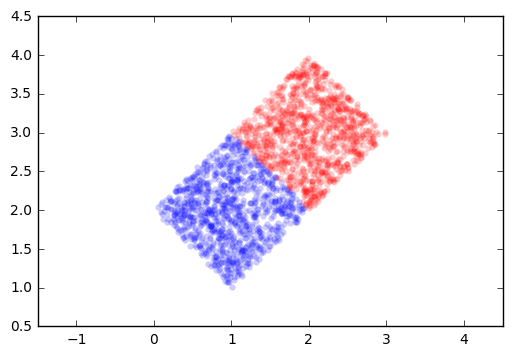

In [3]:
plt.scatter(blue_X[:,0],blue_X[:,1],c='b',lw=0,alpha=0.2);
plt.scatter(red_X[:,0],red_X[:,1],c='r',lw=0,alpha=0.2);
plt.axis('equal');

Let's collect both sets of data together to form the training set X with target vector y:

In [4]:
X = np.vstack([blue_X,red_X])
y = np.concatenate([np.zeros(N),np.ones(N)]) # Blue is 0 and Red is 1

Let's use logistic regression to model the fake data. Recall a logistic regression model is exactly a function of the form:

$$
y = \sigma(Wx + b)
$$

where $W$ (in this case) is a row vector of length 2 (considering $x$ as a column vector) and $b$ is a scalar.

In [5]:
from sklearn.linear_model import LogisticRegression as LR

In [6]:
# Instantiate the model
reg = LR()

In [7]:
# Fit the model on the fake data
reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's create a grid of test data to visualize the decision boundary found by our logistic regression model:

In [8]:
X_test = np.array([[a,b] for a in np.linspace(0,3,50) for b in np.linspace(1,4,50)])
y_test = reg.predict(X_test)

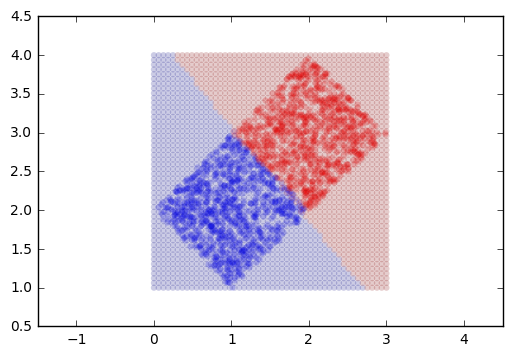

In [9]:
plt.scatter(blue_X[:,0],blue_X[:,1],c='b',lw=0,alpha=0.2);
plt.scatter(red_X[:,0],red_X[:,1],c='r',lw=0,alpha=0.2);

plt.scatter(X_test[:,0],X_test[:,1],c=y_test,lw=0,alpha=0.2)
plt.axis('equal');

Looks pretty good! Let's look at the weight $W$ and bias $b$ computed by our model:

In [10]:
# This is our weight matrix W
reg.coef_

array([[ 3.90806837,  3.19391548]])

In [11]:
# This is our bias b
reg.intercept_

array([-13.73388882])

### A neural network with no hidden layers

So let's do the same thing but now use a neural network object from sklearn.

In [12]:
from sklearn.neural_network import MLPClassifier as mlp

The multilayer perceptron classifier takes several input parameters. In particular, we have to set the alpha coefficient to something a bit bigger than the default (why?...) as well as the maximum number of iterations.

In [13]:
nn = mlp(hidden_layer_sizes=(1,),activation='logistic',max_iter=2000,alpha=0.01)

In [14]:
nn.fit(X,y)

MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

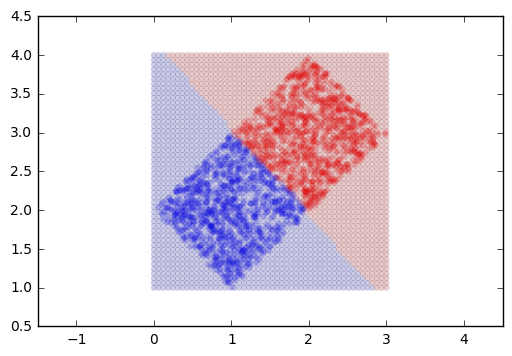

In [15]:
y_nn_test = nn.predict(X_test)

plt.scatter(blue_X[:,0],blue_X[:,1],c='b',lw=0,alpha=0.2);
plt.scatter(red_X[:,0],red_X[:,1],c='r',lw=0,alpha=0.2);

plt.scatter(X_test[:,0],X_test[:,1],c=y_nn_test,lw=0,alpha=0.2)
plt.axis('equal');

Let's look inside the model to set the weight and bias it computed:

In [16]:
nn.coefs_

[array([[-2.22527388],
        [-1.97257131]]), array([[-10.36054536]])]

It only differs from logistic regression by a constant but that means they are pretty much the same!

## 2. Examples: Neural Networks using scikit-learn

Now that we know the structure of a neural network and how to implement one in scikit-learn, let's try to classify hand-written digits.

In [17]:
from sklearn.datasets import load_digits

In [18]:
digits = load_digits()

In [19]:
X = digits.data

In [20]:
y = digits.target

In [21]:
X.shape

(1797, 64)

The dataset consists of 1797 samples of 8 by 8 pixel images of hand-written digits. We can visualize the data with matplotlib's `imshow` function:

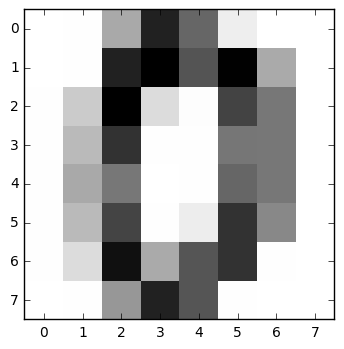

In [22]:
plt.imshow(X[0,:].reshape(8,8),cmap='binary',interpolation='none');

First, let's split the data into a training set and a testing set so that we can fit and then evaluate our model.

In [23]:
from sklearn.model_selection import train_test_split as tts

In [24]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2)

Let's instantiate and then fit our neural network. At this point, we have no idea how to choose the number of layers or the number of neurons in each layer. Let's just do it by trial and error! The best result I got was with a neural network with 3 hidden layers each with 10 neurons. Why? I have no idea.

But beware! There is randomness in the algorithm which trains a neural network and we get different results each time we run the code!

In [25]:
nn_digits = mlp(hidden_layer_sizes=(10,10,10),max_iter=1000)

In [26]:
nn_digits.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [27]:
nn_digits.score(X_test,y_test)

0.92777777777777781

Not bad. But let's compare to the much simpler $k$-nearest neighbors algorithm which takes a new image (a vector in $\mathbb{R}^{64}$) and classifies it by looking at the $k$ nearest points in our training set.

In [28]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [29]:
knn_clf = knn(n_neighbors=7)

In [30]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [31]:
knn_clf.score(X_test,y_test)

0.98333333333333328

Wow! Nearest neighbors far outperforms the neural network! We should keep this mind: complex algorithms are not always better algorithms